In [18]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
from src.wmf import WeightedMatrixFactorization

data = pd.read_csv('./data/data.csv', usecols=['user_id', 'asin', 'rating'])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
# select a subset of the data
sample = data.sample(n=5000, random_state=1)
sample.head()

,asin,user_id,rating
2648222,B000WETHXU,ATLO3YXU2BC16,5.0
440885,B000002K9I,A29SVFF3DC6UR8,5.0
4456289,B0006TPIFM,AH03HYYX6FNHN,5.0
507999,B000002LRA,AZ96LSM1TYT4P,5.0
2743455,B001608R1C,A2ZYUZI8IYF321,4.0


In [40]:
users_list = sample['user_id'].unique()
products_list = sample['asin'].unique()

users_list.shape, products_list.shape

((4867,), (4600,))

In [51]:
products = pd.read_csv('./data/' + "products.csv")
ratings = pd.read_csv('./data/' + "ratings.csv")

# take a sample 
ratings = ratings.sample(n=5000, random_state=1)

print("Number of products: {}".format(len(products)))
print("Number of ratings: {}".format(len(ratings)))

feedback = pd.pivot_table(ratings, values='rating', index=['user_id'], columns=['asin']).values

Number of products: 348893
Number of ratings: 5000


In [46]:
feedback = pd.pivot_table(sample, values='rating', index=['user_id'], columns=['asin']).values
feedback

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [47]:
# read the parameters for the model:
params = pd.read_csv("params.csv")
n_latents = 100 #params['n_latents'][0]
n_iter = 30 #params['n_iter'][0]
lambda_reg = 0.05 #params['lambda_reg'][0]
w_obs = 1.0 #params['w_obs'][0]
w_unobs = 0.1 #params['w_unobs'][0]

# create the model
wmf = WeightedMatrixFactorization(
    feedback, 
    n_latents=n_latents,
    n_iter=n_iter,
    w_obs=w_obs,
    w_unobs=w_unobs,
    lambda_reg=lambda_reg,
    #seed=50
)

# fit the model
hist_loss = wmf.fit(
    method='WALS', 
    verbose=True
)

Loss: 76.872, iteration: 1/30
Loss: 58.533, iteration: 2/30
Loss: 51.472, iteration: 3/30


KeyboardInterrupt: 

# Plot the loss

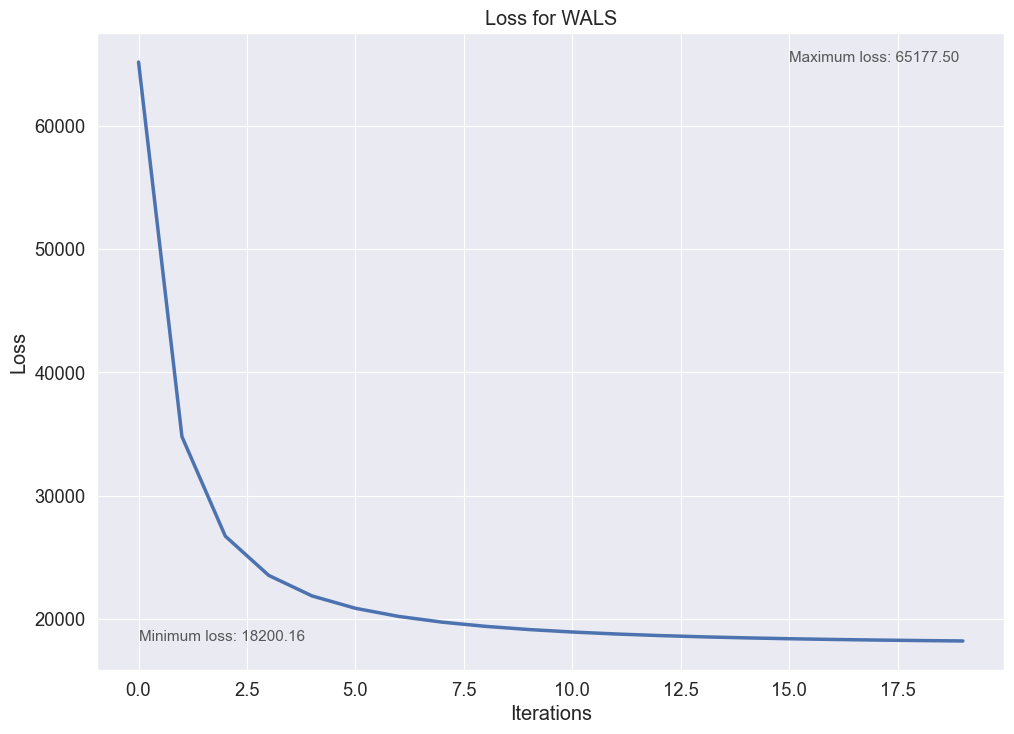

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# sns settings
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_context('paper', font_scale=1.5, rc={"lines.linewidth": 2.5})


lists = sorted(hist_loss.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples

# lineplot 
sns.lineplot(x=list(hist_loss.keys()), y=list(hist_loss.values()))

# text for the minimum value with loss truncated to 3 decimals
plt.text(0, min(hist_loss.values())-0.05, f"Minimum loss: {min(hist_loss.values()):.2f}", fontsize=11, alpha=0.75)
# text for the maximum value with loss truncated to 3 decimals
plt.text(15, max(hist_loss.values())+0.05, f"Maximum loss: {max(hist_loss.values()):.2f}", fontsize=11, alpha=0.75)

plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss for WALS")
plt.show()